In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
head(mpg, 8)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact


### Part 1

Response variable: hwy (highway miles per gallon)

Explanatory variable: displ (engine displacement in liters)

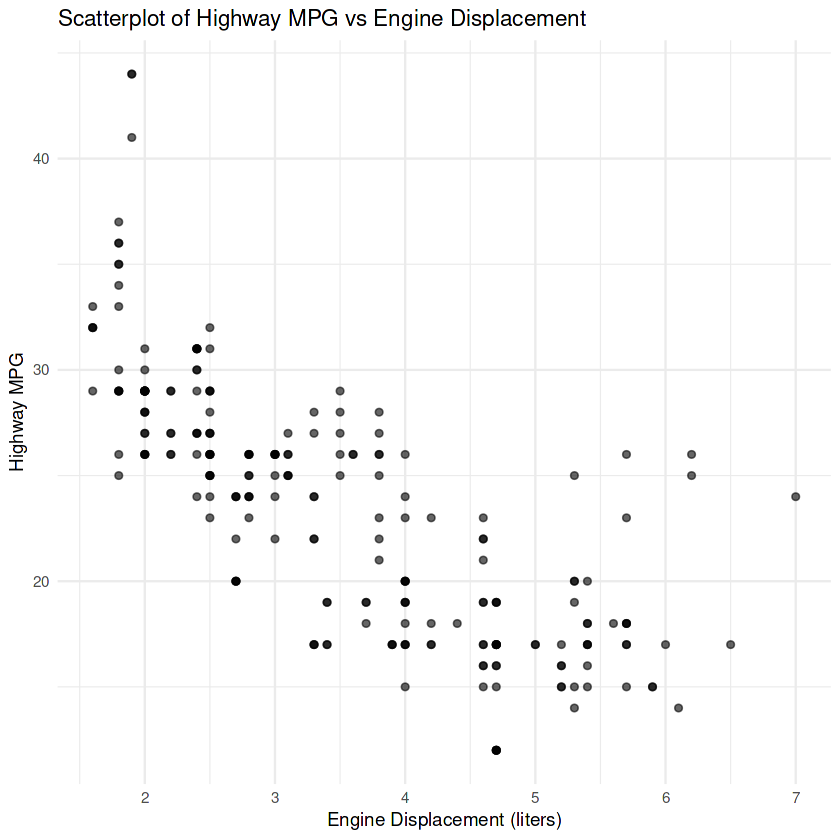

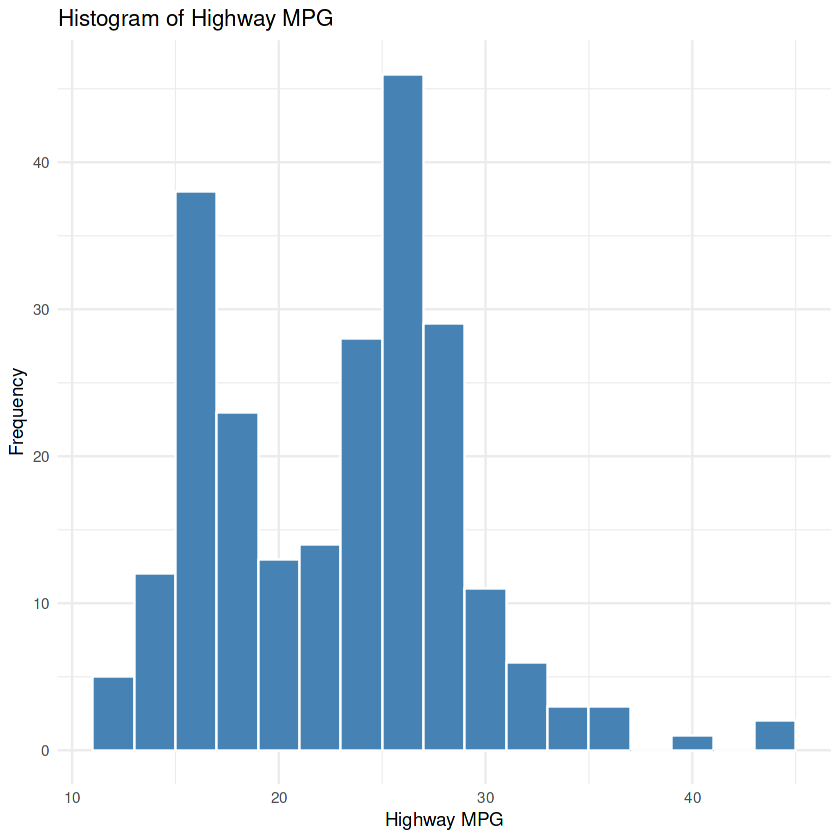

In [5]:
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point(alpha = 0.6) + # alpha makes points slightly transparent to see overlap
  labs(title = "Scatterplot of Highway MPG vs Engine Displacement",
       x = "Engine Displacement (liters)",
       y = "Highway MPG") +
  theme_minimal()

ggplot(mpg, aes(x = hwy)) +
  geom_histogram(binwidth = 2, fill = "steelblue", color = "white") +
  labs(title = "Histogram of Highway MPG",
       x = "Highway MPG",
       y = "Frequency") +
  theme_minimal()

### Part 2


Call:
lm(formula = hwy ~ displ, data = mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1039 -2.1646 -0.2242  2.0589 15.0105 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  35.6977     0.7204   49.55   <2e-16 ***
displ        -3.5306     0.1945  -18.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.836 on 232 degrees of freedom
Multiple R-squared:  0.5868,	Adjusted R-squared:  0.585 
F-statistic: 329.5 on 1 and 232 DF,  p-value: < 2.2e-16


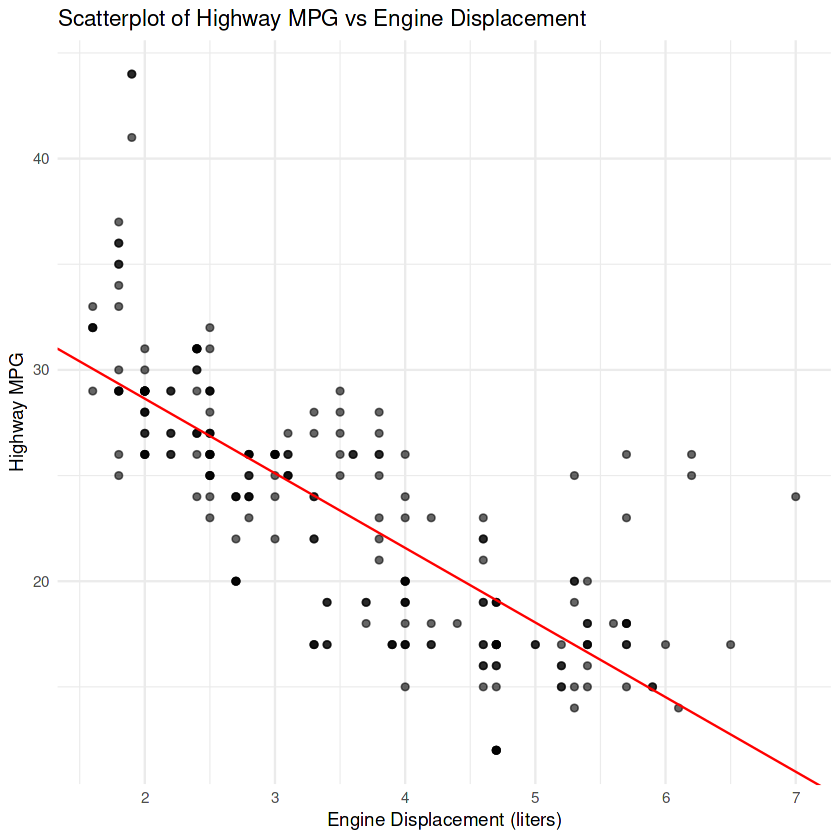

In [8]:
mpg_model <- lm(hwy ~ displ, data = mpg)
summary(mpg_model)

ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point(alpha = 0.6) + # alpha makes points slightly transparent to see overlap
  labs(title = "Scatterplot of Highway MPG vs Engine Displacement",
       x = "Engine Displacement (liters)",
       y = "Highway MPG") +
  theme_minimal() + 
geom_abline(intercept = 35.6977, slope = -3.5306, color = "red")
    

$$\log(\widehat{hwy}) = (35.6977) + (-3.5306) \times \log(displ)$$

### Part 3

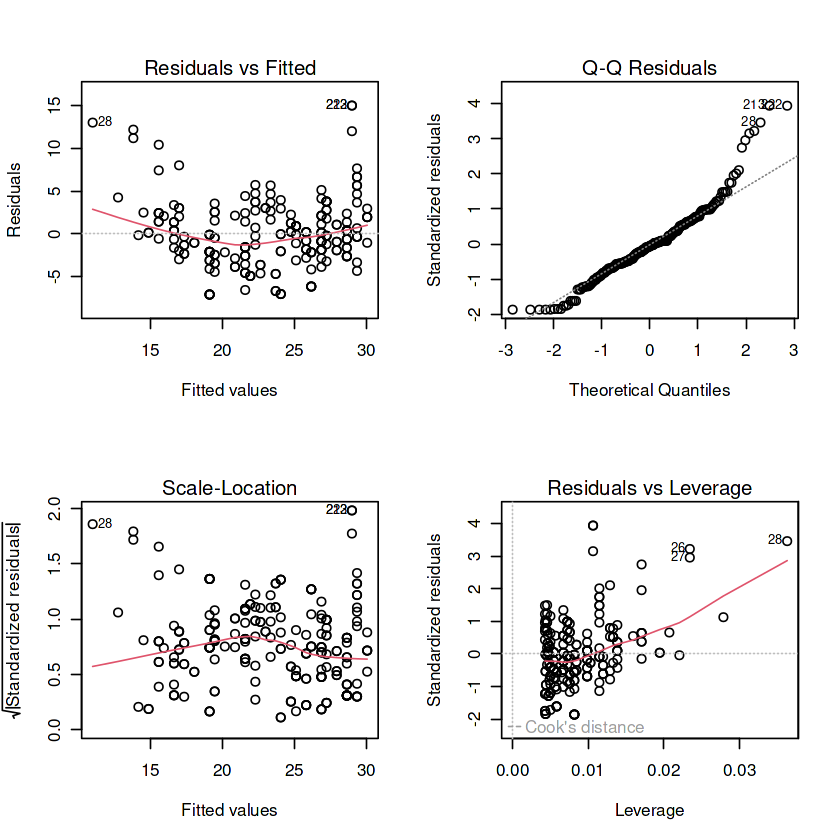

In [9]:
par(mfrow = c(2, 2))
plot(mpg_model)
par(mfrow = c(1, 1))

Plot 1 (Top-Left): Residuals vs Fitted -> Checks Linearity. Look for U-shape (violation).

Plot 2 (Top-Right): Normal Q-Q -> Checks Normality. Points should fall on the dotted line.

Plot 3 (Bottom-Left): Scale-Location -> Checks Constant Variance. Look for fanning (violation).

### Part 4


Call:
lm(formula = log(hwy) ~ log(displ), data = mpg)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43240 -0.08757 -0.01011  0.09514  0.49234 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.76407    0.03364  111.90   <2e-16 ***
log(displ)  -0.54716    0.02726  -20.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1578 on 232 degrees of freedom
Multiple R-squared:  0.6345,	Adjusted R-squared:  0.6329 
F-statistic: 402.8 on 1 and 232 DF,  p-value: < 2.2e-16


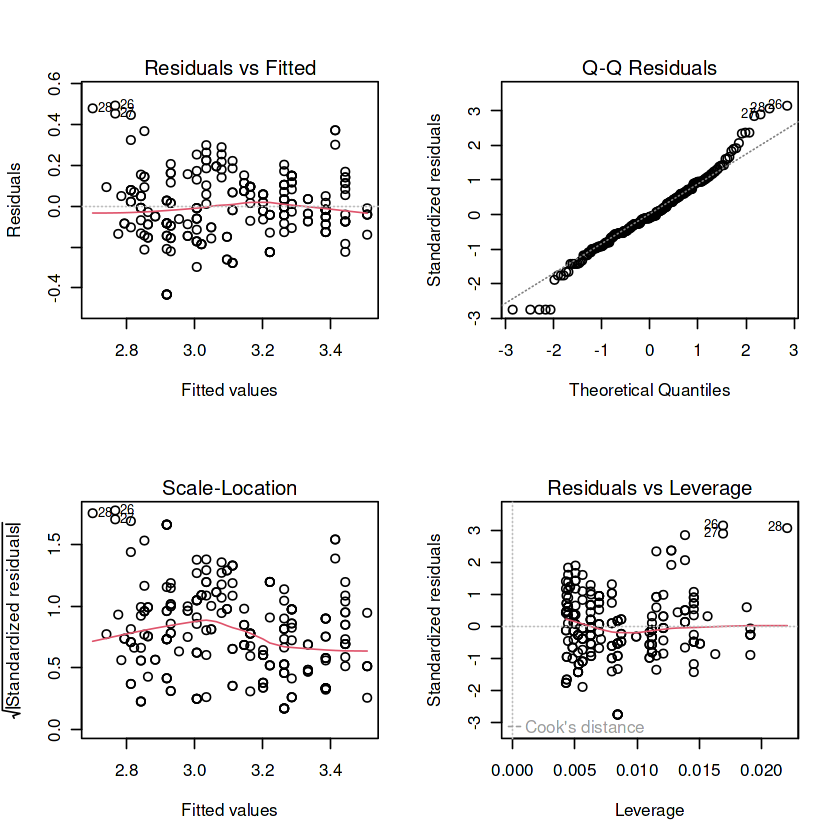

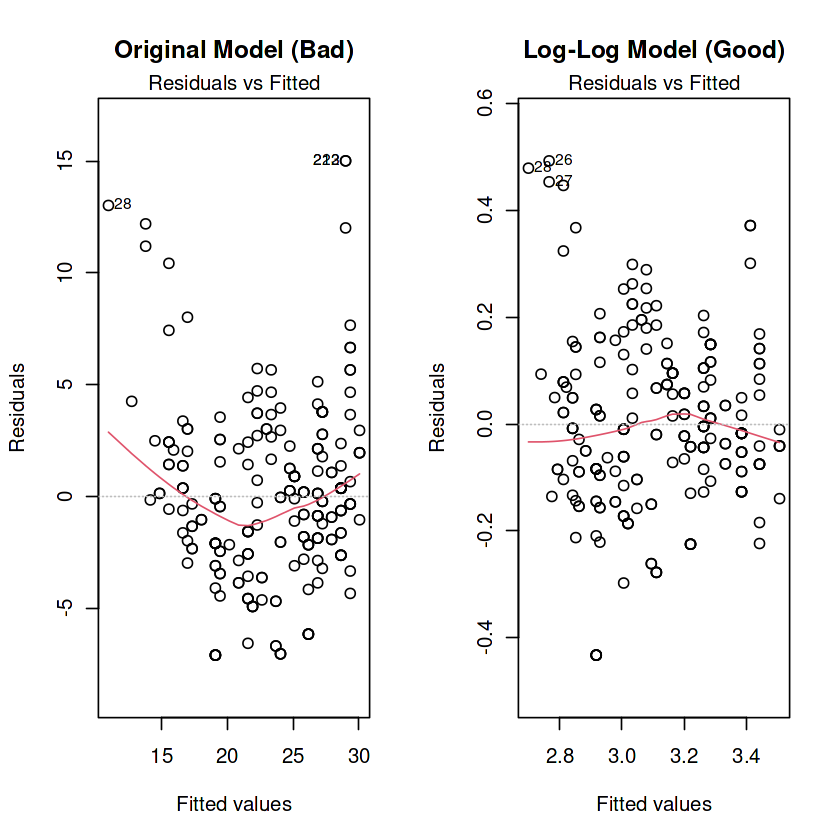

In [14]:
log_model <- lm(log(hwy) ~ log(displ), data = mpg)

summary(log_model)

par(mfrow = c(2, 2))
plot(log_model)
par(mfrow = c(1, 1)) 

par(mfrow = c(1, 2))
plot(mpg_model, which = 1, main = "Original Model")
plot(log_model, which = 1, main = "Log-Log Model")
par(mfrow = c(1, 1))

The original linear model failed to meet the regression assumptions, as evidenced by the distinct 'U-shape' in the residuals (violating linearity) and the 'fan shape' (violating constant variance).

However, the log-log transformed model appears to satisfy these assumptions; the new diagnostic plots show the residuals as a random cloud of points centered around zero, removing the curvature and stabilizing the variance. While the normality of residuals shows minor deviations at the extreme tails, the transformation has significantly improved the overall fit, making the log-log model statistically valid and reliable.

### Part 5

The mpg dataset, specifically the hwy and the dspl columns, followed a inverse correlation: though they exhibit a curvilinear instead of a linear one. This exercise highlighted the danger of relying exclusively on model coefficients; despite a significant slope, the residual plots displayed non-random patterns that invalidated the linear assumption. Because of this, validating model assumptions through visual diagnostics is a critical step in preventing mis-specified models and ensuring predictive accuracy in real world situations.